# Image Colorization Final Project
Authors: Aret Tinoco, Keshav Gupta, Hal Halberstadt

Dataset: https://www.kaggle.com/datasets/darthgera/colorization

---

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image # for resizing images

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid

import tensorflow as tf
from tensorflow.keras import models, layers, Input, Model, callbacks
from tensorflow.keras.layers import Lambda
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from IPython.display import display, HTML

Ease of reading

In [2]:
pd.set_option('display.max_columns', 200)
pd.options.display.width = 120
pd.options.display.max_colwidth = 50
display(HTML("<style>.container { width:100% !important; }</style>"))

Now to state the directory of the data to retrieve from.

In [3]:
data_dir = Path("C:/Users/smhal/Downloads/archive")
img_shape = (512, 512, 3)
# img_shape = (216, 216, 3)

test_folder_paths = ['validation_col_images', 'validation_bw',]
train_folder_paths = ['train_col_images', 'train_black_white_images-v2']

In [4]:
def read_folder(subset_name, data_dir):
    subset_dir = data_dir / subset_name
    pics = subset_dir.glob('*.jpg')
    num_pics = int(len(list(pics))/15)
    print(f"#imgs {num_pics}, folder '{subset_name}'")
    X = np.zeros((num_pics, img_shape[0], img_shape[1], img_shape[2]), dtype='float32')
    y = np.empty(num_pics, dtype='object')
    for i, pic in enumerate(subset_dir.glob('*.jpg')):
        if i < num_pics:
            fruit_name = pic.name.split('-')[0]
            y[i] = fruit_name
            img = load_img(pic)
            X[i] = img
            
    # possibly reduce size of images to be able to run smoothly
    
    
#     return (X.astype('float32') / 255), y
    return (X / 255), y
#     return X.astype('uint8'), y

Next I want to read the data from the files and then just to make sure I am getting the right data from the right files

In [5]:
X_train, X_train_label = read_folder(train_folder_paths[1], data_dir)

y_train, y_train_label = read_folder(train_folder_paths[0], data_dir)

#imgs 1333, folder 'train_black_white_images-v2'
#imgs 1333, folder 'train_col_images'


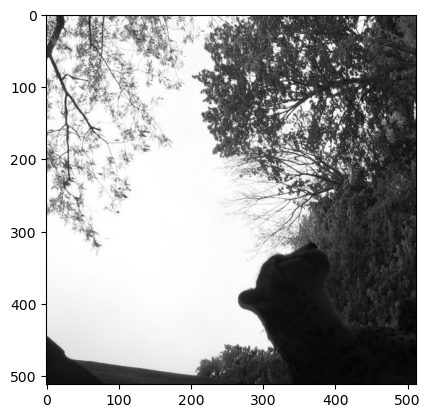

In [6]:
plt.imshow(X_train[0]);

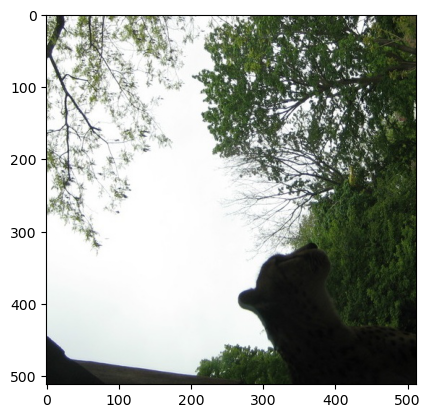

In [7]:
plt.imshow(y_train[0]);

In [8]:
X_test, X_test_label = read_folder(test_folder_paths[1], data_dir) # BW imgs
y_test, y_test_label = read_folder(test_folder_paths[0], data_dir)

#imgs 166, folder 'validation_bw'
#imgs 166, folder 'validation_col_images'


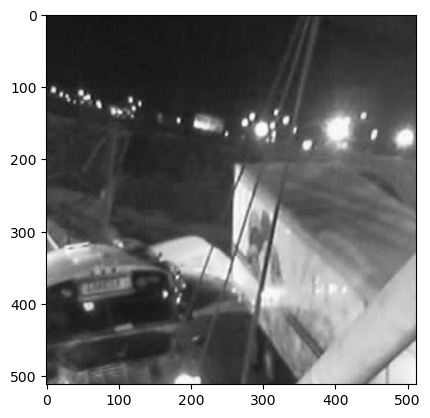

In [9]:
plt.imshow(X_test[0]);

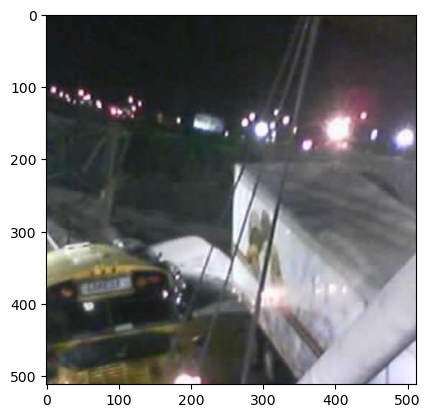

In [10]:
plt.imshow(y_test[0]);

In [11]:
# type(y_test[0][0][0][0])
# image_resized = tf.image.resize(images, [224, 224])
# def generator():
#     i = 0
#     while True:
#         i += 1
#         yield i

# for item in generator():
#     print(item)
#     if item > 4:
#     break

In [12]:
# datagen = ImageDataGenerator(
#     zoom_range=[0.8, 1.0],
#     rotation_range=20, # degree range, +/- 20
#     horizontal_flip=True)

In [13]:
# datagen.fit(X_train)

In [14]:
K.clear_session()  # delete old models
act_fun='relu'

inputs=Input(img_shape)

# YOUR CONVOLUTIONAL LAYERS GO HERE
filters=3

x = layers.SeparableConv2D(filters, 2, padding='same', activation=act_fun)(inputs)
x = layers.SeparableConv2D(filters, 2, padding='same', activation=act_fun)(inputs)
x = layers.SeparableConv2D(filters, 2, padding='same', activation=act_fun)(inputs)
x = layers.SeparableConv2D(filters, 2, padding='same', activation=act_fun)(inputs)
# x = layers.MaxPooling2D(2, padding='same', strides=1)(x)

# Flatten and output Block
embedding_model = Model(inputs, x)

In [15]:
embedding_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_input/conv1 (Separab  (None, 512, 512, 3)      24        
 leConv2D)                                                       
                                                                 
 block1_pooling (MaxPooling2  (None, 512, 512, 3)      0         
 D)                                                              
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [16]:
# input0 = Input(img_shape, name='input0')
# input1 = Input(img_shape, name='input1')
# input2 = Input(img_shape, name='input2')

# sub0 = embedding_model(input0)
# sub1 = embedding_model(input1)
# sub2 = embedding_model(input2)

# pred = layers.Concatenate(axis=1)([sub0, sub1, sub2])

# model = Model([input0, input1, input2], pred)

# model.compile(optimizer='rmsprop', loss='mse',  metrics=['accuracy'])

In [17]:
# model.summary()

In [18]:
# model_input = datagen.flow(X_train, y_train, batch_size=32)

embedding_model.compile(optimizer='rmsprop', loss='mse',  metrics=['loss'])
embedding_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
42/42 [==============================] - 20s 449ms/step - loss: 0.1235 - accuracy: 0.5833 - val_loss: 0.1059 - val_accuracy: 0.5881
Epoch 2/5
42/42 [==============================] - 17s 403ms/step - loss: 0.0929 - accuracy: 0.5554 - val_loss: 0.0911 - val_accuracy: 0.5450
Epoch 3/5
42/42 [==============================] - 17s 415ms/step - loss: 0.0864 - accuracy: 0.4550 - val_loss: 0.0893 - val_accuracy: 0.4797
Epoch 4/5
42/42 [==============================] - 17s 403ms/step - loss: 0.0856 - accuracy: 0.4612 - val_loss: 0.0888 - val_accuracy: 0.5271
Epoch 5/5
42/42 [==============================] - 16s 392ms/step - loss: 0.0852 - accuracy: 0.5499 - val_loss: 0.0886 - val_accuracy: 0.5778


1/1 [==============================] - 0s 250ms/step


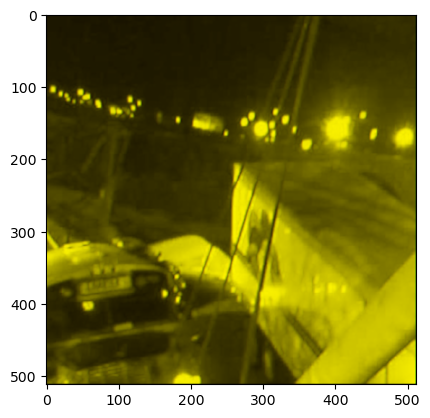

In [19]:
output = embedding_model.predict(X_test[:3])
plt.imshow(output[0]);

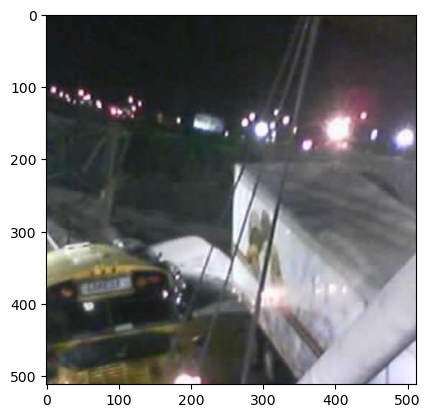

In [20]:
plt.imshow(y_test[0]);

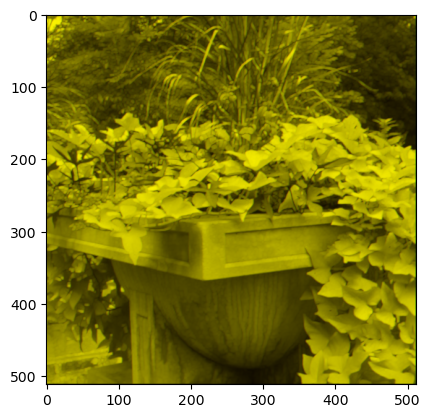

In [21]:
plt.imshow(output[1]);

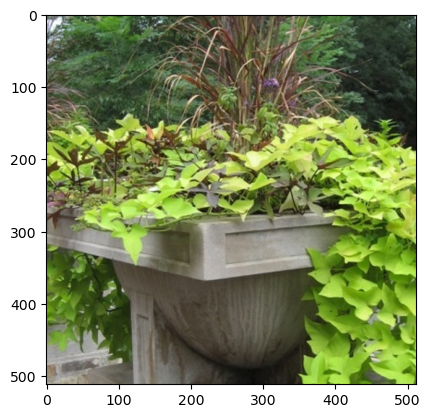

In [22]:
plt.imshow(y_test[1]);

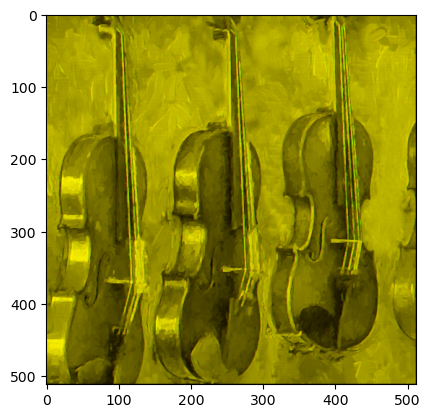

In [23]:
plt.imshow(output[2]);

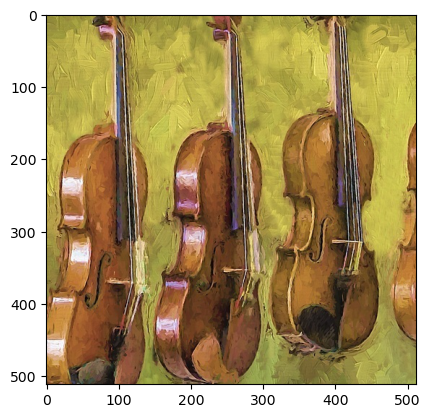

In [24]:
plt.imshow(y_test[2]);

END